## Title: DSC550 Final: Milestone3
## Date: Novenber 10, 2022
## Author: Venkat jagadeesh jampani

In [1]:
# Installing all required libraries
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
from textblob import TextBlob
import warnings

In [2]:
#Bringing the steps from Milestone1 - loading dataframe, creating new df, dropping columns, renaming columns etc.
pd.set_option('display.max_colwidth', None)

#Load dataframes.
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')

#finding all Apple entries within the first df
AP = items['title'].str.lower().str.find('iphone x')!=-1

#creating a new df based on the search.
items_df = items.loc[AP]

#merging the two dataframes based on  asin#.
apple_reviews = pd.merge(items_df,reviews, on='asin')

#Dropping nan values.
apple_reviews = apple_reviews.dropna()

#Dropping erroneous/unwanted columns.
del apple_reviews['image']
del apple_reviews['url']
del apple_reviews['reviewUrl']
del apple_reviews['price']
del apple_reviews['name']
del apple_reviews['rating_x']

#Renaming columns.
apple_reviews.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple_reviews['Date'] = pd.to_datetime(apple_reviews['Date']) #Reformatting date/time format.




In [3]:
#printing data
apple_reviews

,Item #,Brand,Model,Reviews,Price,Rating,Date,Verified,Review Title,Review,Helpful
0,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,1,2018-11-07,True,Cracked and does not turn on.,The screen was cracked and the phone did not turn in after 24 hours of charging.,124.0
1,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,1,2018-11-26,True,Not a Refurbished Iphone,"It is not a Refurbished iphone, it is activated",120.0
2,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,1,2019-04-20,True,Possibility to change the phone?,I bought this phone and this is my first picture with the back camera and also when Im tapping look like multitouch. There is any possibility to change the phone?,101.0
3,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,1,2019-01-08,True,Don't buy from this seller.,"This product is falsely labeled as unlocked, it's been 4 weeks since I informed that the phone was still locked and all I get are excuses. Plus, the phone came in a really bad condition, so many scratches you can see them very clearly.",95.0
4,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,1,2019-04-16,True,THIS PHONE WAS NOT PAYED OFF,"I purchased a refurbished iPhone x, it arrived on time, came in clean , and with a charger.... i was excited about this phone because my other phone was stolen 3 months ago, i got a job and saved up to be able to afford a new one. We tried to set up the service with total wireless and the phone kept repeating the message that the sim card was not compatible.... so we bought another sim card and service plan by t mobile and got the same thing.... went into apple the next day to try to see if their was anything wrong with the phone... turns out their was nothing wrong with the phone, but the phone already had another service plan with at&t that wasn't even payed off.... so after wasting 10 hours off my time, and spending $60 (besides the $690 phone price) trying to set this stupid phone up with a service plan... i would review this 0 stars if i could",71.0
...,...,...,...,...,...,...,...,...,...,...,...
1784,B07RT1X4FJ,Apple,"Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)",198,0.00,1,2019-11-13,True,"Dud phone, likely due to tampering","These people tamper with the phones in order to unlock them, in my case it arrived unable to be updated to any version of iOS, rendering it useless, as you have to update to restore from backup. It's also unable to be restored to complete factory reset (through the recovery screen reset method using itunes). I got on the phone with them and they told me to ""Wait a couple of days"" because there's a problem at apple's end. Joke is on them, I talked to apple to try and get this thing updated but no matter what we tried it was impossible. The phone is a dud and they want me to wait a few days? Get real!",3.0
1785,B07RT1X4FJ,Apple,"Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)",198,0.00,1,2019-11-27,True,Scratched AF. Beat down phone.,"Phone works fine, but the claim “looks like new” is a joke. I tried twice ordering from the same seller and the condition was worse the 2nd time. Covered in scratches and battery life depleted to 86%. Sad, irritating experience and sellers route of recourse was to call a phone number that responded “mailbox full”. Save yourself the frustration and order a phone directly from Apple.",3.0
1788,B07RT1X4FJ,Apple,"Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)",198,0.00,1,2019-12-20,True,Don’t do it!,I know the price point is tempting but don’t do it! I just received the iPhone I ordered and it was terrible condition. I’m not sure how it passed their “quality inspection” but it came with scratches all over and with a broken screen... It gets better because now I have to pay for the return shipping. Just save yourself a headache and don’t do it.,

In [4]:
# Bringing steps from Milestone2 
del apple_reviews['Brand']
del apple_reviews['Review Title']
del apple_reviews['Reviews']
del apple_reviews['Helpful']
del apple_reviews['Verified']

# Sentiment Analysis:
# change to lower case.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing punctuation.
apple_reviews['Review'] = apple_reviews['Review'].map(lambda x: re.sub(r'\W+', ' ', x))

#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Word tokenizing
apple_reviews['Review'] = apple_reviews['Review'].apply(word_tokenize) 

#word stemming
stemmer = PorterStemmer()
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))

#List of keywords people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']

#Searching all rows for items in the lists.
batt = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Screen))]

#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Topic'] = 'Battery'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Topic'] = 'Camera'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Topic'] = 'Speed'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Topic'] = 'Storage'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Topic'] = 'Software'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Topic'] = 'Music'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Topic'] = 'Screen'

#Merging the dataframes into one..
a_df = [batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical])

#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
del a_df['Date']
del a_df['Score']

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_18584/4142222132.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Score'] = batt['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_18584/4142222132.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_18584/4142222132.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

End of Milestone 1 & 2 and Start of Milestone3

In [6]:
#Starting to normalize the price and rating columns.
a_df['Price'] = a_df['Price']/a_df['Price'].max()
a_df['Rating'] = a_df['Rating']/a_df['Rating'].max()
a_df.head()

,Price,Rating,Positivity,Topic_Battery,Topic_Camera,Topic_Music,Topic_Screen,Topic_Software,Topic_Speed,Topic_Storage,Item #_B0775451TT,Item #_B077578W38,Item #_B0775H5HJW,Item #_B07D6TQP6F,Item #_B07KFNRQ5S,Item #_B07KKL5KGG,Item #_B07P6Y8L3F,Item #_B07RDMLR4V,Item #_B07RKYQSRB,Item #_B07RT1X4FJ
0,1.0,0.2,-0.185281,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.472727,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.0,0.2,0.155556,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,0.4,0.196667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1.0,1.0,-0.237784,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [7]:
#Creating a list and looping through to format.
a_df_list = list(a_df_cat.columns)+['Price',"Rating"]

for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [8]:
#Creating a linear regression and converting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [9]:
#Displaying the results and formatting it.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: -13518904643374.525
Topic_Camera: -13518904643374.594
Topic_Music: -13518904643374.527
Topic_Screen: -13518904643374.58
Topic_Software: -13518904643374.588
Topic_Speed: -13518904643374.594
Topic_Storage: -13518904643374.6
Item #_B0775451TT: -3366574469290.9404
Item #_B077578W38: -700763379549.0848
Item #_B0775H5HJW: -3313293081225.5015
Item #_B07D6TQP6F: -700763379548.9995
Item #_B07KFNRQ5S: -700763379549.0597
Item #_B07KKL5KGG: -700763379549.0402
Item #_B07P6Y8L3F: -700763379549.119
Item #_B07RDMLR4V: -700763379549.0593
Item #_B07RKYQSRB: -700763379548.9878
Item #_B07RT1X4FJ: -700763379549.0415
Price: 2665811089741.944
Rating: 0.2830088246910591


In [10]:
#Feature reduction
max_val=max(coef)
important_features = []

for coe,f_name in zip(coef,a_df_list):
    if abs(coe) > max_val/1000:
        important_features.append(f_name)
        
print(important_features)

['Topic_Battery', 'Topic_Camera', 'Topic_Music', 'Topic_Screen', 'Topic_Software', 'Topic_Speed', 'Topic_Storage', 'Item #_B0775451TT', 'Item #_B077578W38', 'Item #_B0775H5HJW', 'Item #_B07D6TQP6F', 'Item #_B07KFNRQ5S', 'Item #_B07KKL5KGG', 'Item #_B07P6Y8L3F', 'Item #_B07RDMLR4V', 'Item #_B07RKYQSRB', 'Item #_B07RT1X4FJ', 'Price']


In [11]:
#Creating a linear regression and convrting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[important_features], a_df["Positivity"])
coef = regr.coef_.tolist()

In [12]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(important_features,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: -17974826733265.246
Topic_Camera: -17974826733265.355
Topic_Music: -17974826733265.28
Topic_Screen: -17974826733265.34
Topic_Software: -17974826733265.367
Topic_Speed: -17974826733265.312
Topic_Storage: -17974826733265.34
Item #_B0775451TT: -15354436882882.64
Item #_B077578W38: -3225166997597.4653
Item #_B0775H5HJW: -15112009976416.646
Item #_B07D6TQP6F: -3225166997597.3945
Item #_B07KFNRQ5S: -3225166997597.4297
Item #_B07KKL5KGG: -3225166997597.459
Item #_B07P6Y8L3F: -3225166997597.4727
Item #_B07RDMLR4V: -3225166997597.4272
Item #_B07RKYQSRB: -3225166997597.3335
Item #_B07RT1X4FJ: -3225166997597.4624
Price: 12129269885285.248


In [13]:
#Hyperparametic tuning with lasso regression
lasso_model = Lasso(alpha=.001)
lasso_model.fit(a_df[a_df_list],a_df['Positivity'])

coef = lasso_model.coef_.tolist()
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: 0.022536719978821514
Topic_Camera: -0.026651152936723686
Topic_Music: 0.01216660599509831
Topic_Screen: 0.000373935778367351
Topic_Software: -0.0
Topic_Speed: -0.0
Topic_Storage: -0.003214750161088483
Item #_B0775451TT: 0.036340444971421235
Item #_B077578W38: -0.02977395034120109
Item #_B0775H5HJW: -0.0
Item #_B07D6TQP6F: 0.04453698039137371
Item #_B07KFNRQ5S: -0.0
Item #_B07KKL5KGG: 0.0
Item #_B07P6Y8L3F: -0.008329253301070129
Item #_B07RDMLR4V: -0.0
Item #_B07RKYQSRB: 0.0
Item #_B07RT1X4FJ: 0.0
Price: 0.008179348289185283
Rating: 0.2682578144229547


Running Linear Regression on required columns

<AxesSubplot:xlabel='Topic_Camera', ylabel='Positivity'>

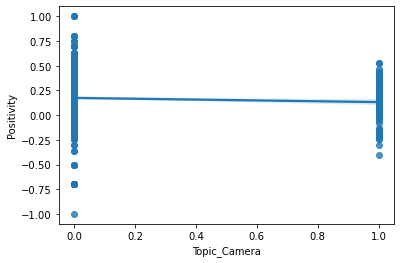

In [14]:
#Linear regression (Camera, Positivity)
sns.regplot(x="Topic_Camera",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Topic_Music', ylabel='Positivity'>

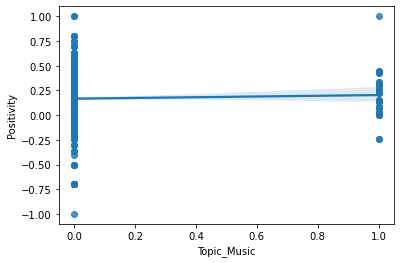

In [15]:
#Linear regression (Music, Positivity)
sns.regplot(x="Topic_Music",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Topic_Software', ylabel='Positivity'>

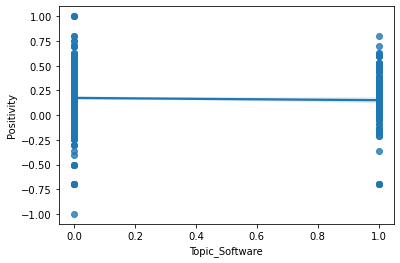

In [16]:
#Linear regression (Software, Positivity)
sns.regplot(x="Topic_Software",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

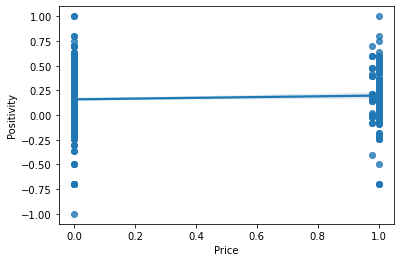

In [17]:
#Linear regression (Price, Positivity)
sns.regplot(x="Price",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Rating', ylabel='Positivity'>

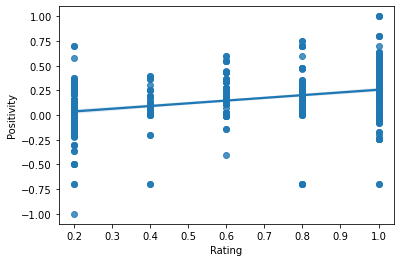

In [18]:
#Linear regression (Rating, Positivity)
sns.regplot(x="Rating",y="Positivity",data=a_df)